# HW 3

In [1]:
import os
if not os.path.exists('san_rafael'):
    !wget -O san_rafael.zip https://www.dropbox.com/scl/fi/pyl1h8g56xdp74568aizj/san_rafael.zip?rlkey=kvfzhierbe938lt4vdgjx8mv6&dl=1
    !unzip san_rafael.zip

Streaming output truncated to the last 5000 lines.
  inflating: san_rafael/label/002994.png  
  inflating: san_rafael/label/003452.png  
  inflating: san_rafael/label/003334.png  
  inflating: san_rafael/label/001523.png  
  inflating: san_rafael/label/000629.png  
  inflating: san_rafael/label/001537.png  
  inflating: san_rafael/label/003320.png  
  inflating: san_rafael/label/002980.png  
  inflating: san_rafael/label/003446.png  
  inflating: san_rafael/label/002758.png  
  inflating: san_rafael/label/001251.png  
  inflating: san_rafael/label/002770.png  
  inflating: san_rafael/label/001279.png  
  inflating: san_rafael/label/000167.png  
  inflating: san_rafael/label/000601.png  
  inflating: san_rafael/label/002016.png  
  inflating: san_rafael/label/003308.png  
  inflating: san_rafael/label/002002.png  
  inflating: san_rafael/label/000615.png  
  inflating: san_rafael/label/000173.png  
  inflating: san_rafael/label/002764.png  
  inflating: san_rafael/label/002823.png  
  i

 Load the PNGs from the image , label and height directories into separate Numpy arrays

In [16]:
import numpy as np
import imageio
import glob

os.chdir("/content/san_rafael")
image_paths = sorted(glob.glob("/content/san_rafael/image/*.png"))
label_paths = sorted(glob.glob("/content/san_rafael/label/*.png"))
height_paths = sorted(glob.glob("/content/san_rafael/height/*.png"))

image_array = np.array([imageio.imread(image) for image in image_paths])
label_array = np.array([imageio.imread(label) for label in label_paths])
height_array = np.array([imageio.imread(height) for height in height_paths])

<ipython-input-16-fb8f0d01b0f8>:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image_array = np.array([imageio.imread(image) for image in image_paths])
<ipython-input-16-fb8f0d01b0f8>:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  label_array = np.array([imageio.imread(label) for label in label_paths])
<ipython-input-16-fb8f0d01b0f8>:12: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` direc

Convert the height array to float32 and divide by the maximum height value.

In [3]:
print(image_array.shape)
print(label_array.shape)
print(height_array.shape)
max_height = np.max(height_array)
print(max_height)

(4040, 256, 256, 3)
(4040, 256, 256)
(4040, 256, 256)
122


In [17]:
height_array32 = height_array.astype(np.float32) / 122.0

Show a few examples from the image , label , and height arrays to make sure everything
looks okay


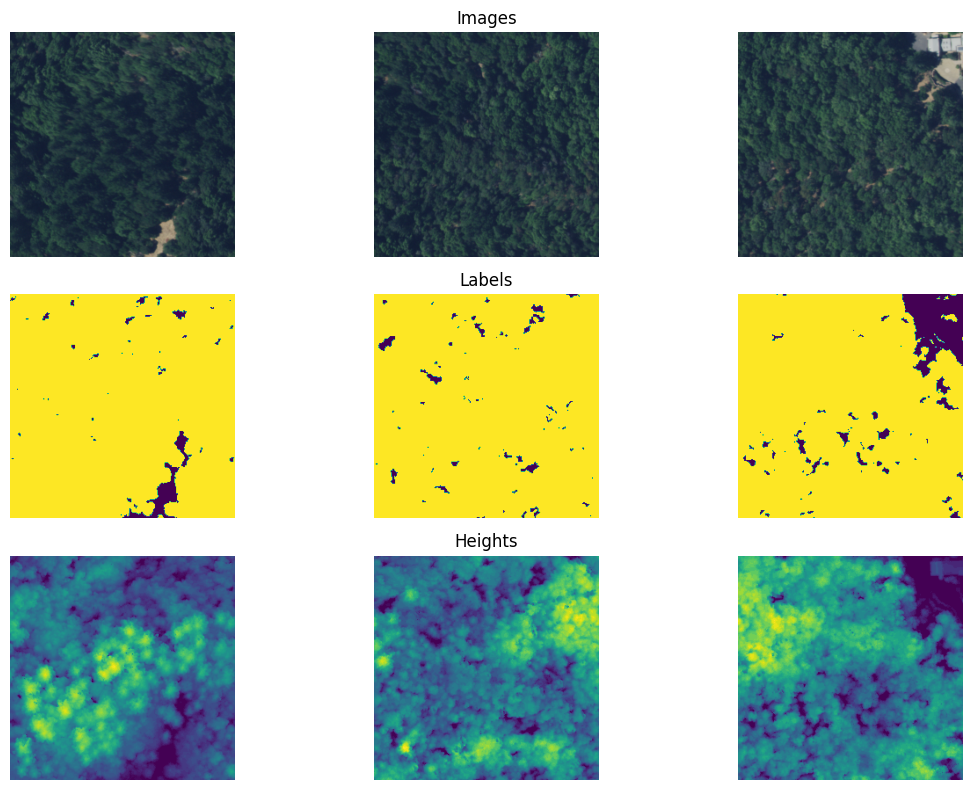

In [18]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(3, 3, figsize=(12, 8))

for i in range(3):
    axes[0, i].imshow(image_array[i])
    axes[0, i].axis('off')

for i in range(3):
    axes[1, i].imshow(label_array[i])
    axes[1, i].axis('off')

for i in range(3):
    axes[2, i].imshow(height_array32[i])
    axes[2, i].axis('off')

axes[0, 1].set_title('Images')
axes[1, 1].set_title('Labels')
axes[2, 1].set_title('Heights')

plt.tight_layout()
plt.show()

Split each array into train and test splits

In [19]:
from sklearn.model_selection import train_test_split
image_train, image_test, label_train, label_test, height_train, height_test = train_test_split(image_array, label_array, height_array32, test_size=0.1, random_state=42)
print(image_array.shape)
del image_array, label_array, height_array
import gc
gc.collect()


(4040, 256, 256, 3)


93718

# Create the classification CNN

In [10]:
from keras import Sequential
from keras.optimizers import SGD, Adam
from keras.layers import Input, Conv2D, MaxPooling2D, Lambda, Dropout
from keras.regularizers import L2

model = Sequential()
model.add(Lambda(lambda x:x/255-0.5, input_shape=(256, 256, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(1, (1, 1), activation='sigmoid', padding='same'))
model.summary()

opt = Adam(learning_rate=4e-4)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
model.fit(image_train, label_train, epochs=10, batch_size=32, validation_split=0.1, verbose=True)

test_loss, test_accuracy = model.evaluate(image_test, label_test)
print("Test Accuracy:", test_accuracy)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/lambda_layer.py:65: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda (Lambda)                      │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256, 256, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 256, 256, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256, 256, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 256, 256, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 256, 256, 1)         │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,377 (364.75 KB)

 Trainable params: 93,377 (364.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 85s 569ms/step - accuracy: 0.7108 - loss: 0.5320 - val_accuracy: 0.8503 - val_loss: 0.3405
Epoch 2/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 33s 319ms/step - accuracy: 0.8705 - loss: 0.3134 - val_accuracy: 0.8646 - val_loss: 0.3099
Epoch 3/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 33s 320ms/step - accuracy: 0.8784 - loss: 0.2929 - val_accuracy: 0.8698 - val_loss: 0.3043
Epoch 4/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 33s 316ms/step - accuracy: 0.8787 - loss: 0.2909 - val_accuracy: 0.8771 - val_loss: 0.2902
Epoch 5/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 41s 316ms/step - accuracy: 0.8850 - loss: 0.2788 - val_accuracy: 0.8790 - val_loss: 0.2841
Epoch 6/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 40s 312ms/step - accuracy: 0.8869 - loss: 0.2720 - val_accuracy: 0.8793 - val_loss: 0.2829
Epoch 7/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 42s 321ms/step - accuracy: 0.8870 - loss: 0.2733 - val_accuracy: 0.8807 - val_loss: 0.2791
Epoch 8/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 41s 317ms/step - accuracy: 0.8874 - loss: 0

Show the result of running the model on a few test set images side-by-side with the ground truth labels.

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step


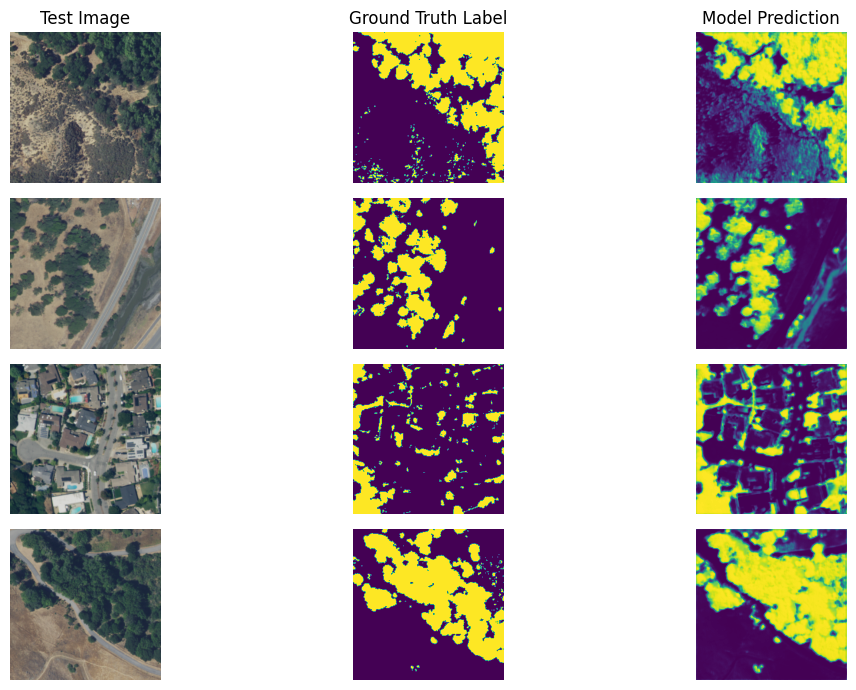

404


In [11]:
predictions = model.predict(image_test)
fig, axes = plt.subplots(4, 3, figsize=(12, 7))

axes[0, 0].set_title("Test Image")
axes[0, 1].set_title("Ground Truth Label")
axes[0, 2].set_title("Model Prediction")

axes[0, 0].imshow(image_test[0])
axes[0, 0].axis('off')

axes[0, 1].imshow(label_test[0])
axes[0, 1].axis('off')

axes[0, 2].imshow(predictions[0])
axes[0, 2].axis('off')

axes[1, 0].imshow(image_test[100])
axes[1, 0].axis('off')

axes[1, 1].imshow(label_test[100])
axes[1, 1].axis('off')

axes[1, 2].imshow(predictions[100])
axes[1, 2].axis('off')

axes[2, 0].imshow(image_test[150])
axes[2, 0].axis('off')

axes[2, 1].imshow(label_test[150])
axes[2, 1].axis('off')

axes[2, 2].imshow(predictions[150])
axes[2, 2].axis('off')

axes[3, 0].imshow(image_test[400])
axes[3, 0].axis('off')

axes[3, 1].imshow(label_test[400])
axes[3, 1].axis('off')

axes[3, 2].imshow(predictions[400])
axes[3, 2].axis('off')
plt.tight_layout()
plt.show()
print(len(image_test))


# Create the regression CNN

In [20]:
from keras.layers import Dropout
regression_model = Sequential()
regression_model.add(Lambda(lambda x:x/255-0.5, input_shape=(256, 256, 3)))
regression_model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
regression_model.add(Dropout(0.25))
regression_model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
regression_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
regression_model.add(Conv2D(1, (1, 1), activation='linear', padding='same'))
regression_model.summary()

opt2 = Adam(learning_rate=4e-4)
regression_model.compile(optimizer=opt2, loss='mean_absolute_error')
regression_model.fit(image_train, height_train, epochs=10, batch_size=32, validation_split=0.1, verbose=True)

test_mae = regression_model.evaluate(image_test, height_test)
print("Test MAE:", test_mae)

test_mae_meters = test_mae * 122 #max height
print("Test MAE in meters:", test_mae_meters)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda_2 (Lambda)                    │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256, 256, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 256, 256, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 256, 256, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 256, 256, 1)         │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,377 (364.75 KB)

 Trainable params: 93,377 (364.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 33s 302ms/step - loss: 0.0297 - val_loss: 0.0259
Epoch 2/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 39s 290ms/step - loss: 0.0260 - val_loss: 0.0242
Epoch 3/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 41s 288ms/step - loss: 0.0256 - val_loss: 0.0245
Epoch 4/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 31s 300ms/step - loss: 0.0242 - val_loss: 0.0240
Epoch 5/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 41s 298ms/step - loss: 0.0245 - val_loss: 0.0244
Epoch 6/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 41s 298ms/step - loss: 0.0238 - val_loss: 0.0227
Epoch 7/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 41s 302ms/step - loss: 0.0240 - val_loss: 0.0226
Epoch 8/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 41s 298ms/step - loss: 0.0236 - val_loss: 0.0238
Epoch 9/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 41s 298ms/step - loss: 0.0234 - val_loss: 0.0224
Epoch 10/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 31s 297ms/step - loss: 0.0232 - val_loss: 0.0219
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 0.0212
Test MAE: 0.02071145921945572
Test MAE in meters: 2.52

Show the result of running the model on a few test set images side-by-side with the ground truth
heights.

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step


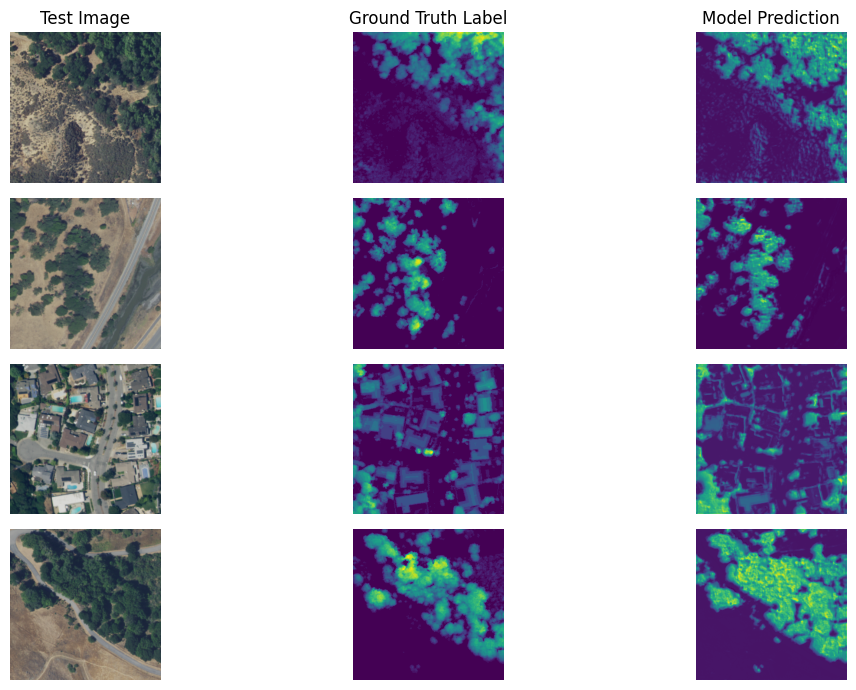

In [21]:
from matplotlib import pyplot as plt
predictions = regression_model.predict(image_test)
fig, axes = plt.subplots(4, 3, figsize=(12, 7))

axes[0, 0].set_title("Test Image")
axes[0, 1].set_title("Ground Truth Label")
axes[0, 2].set_title("Model Prediction")

axes[0, 0].imshow(image_test[0])
axes[0, 0].axis('off')

axes[0, 1].imshow(height_test[0])
axes[0, 1].axis('off')

axes[0, 2].imshow(predictions[0])
axes[0, 2].axis('off')

axes[1, 0].imshow(image_test[100])
axes[1, 0].axis('off')

axes[1, 1].imshow(height_test[100])
axes[1, 1].axis('off')

axes[1, 2].imshow(predictions[100])
axes[1, 2].axis('off')

axes[2, 0].imshow(image_test[150])
axes[2, 0].axis('off')

axes[2, 1].imshow(height_test[150])
axes[2, 1].axis('off')

axes[2, 2].imshow(predictions[150])
axes[2, 2].axis('off')

axes[3, 0].imshow(image_test[400])
axes[3, 0].axis('off')

axes[3, 1].imshow(height_test[400])
axes[3, 1].axis('off')

axes[3, 2].imshow(predictions[400])
axes[3, 2].axis('off')
plt.tight_layout()
plt.show()